# pytorch autoencoder 

In [ ]:
# add new comment

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Transformation for the images
transform = transforms.Compose([transforms.ToTensor()])

# CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Data loader
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=10, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(dataloader))

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),  # b, 16, 16, 16
            nn.ReLU(True),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # b, 32, 8, 8
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # b, 64, 4, 4
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # b, 128, 2, 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # b, 64, 4, 4
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # b, 32, 8, 8
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # b, 16, 16, 16
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # b, 3, 32, 32
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialize the model
# Create the CAE model
autoencoder = Autoencoder()

# If CUDA is available, move the model to GPU
if torch.cuda.is_available():
    autoencoder = autoencoder.cuda()

# Define the optimizer and loss function
optimizer = torch.optim.Adam(autoencoder.parameters())
loss_fn = nn.MSELoss()

# Number of epochs
num_epochs = 1q

# Train the autoencoder
# Train the autoencoder
for epoch in range(num_epochs):
    train_loss = 0
    for batch in dataloader:
        images, _ = batch

        # If CUDA is available, move the images to GPU
        if torch.cuda.is_available():
            images = images.cuda()
            image.shape

        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = loss_fn(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)

    train_loss = train_loss / len(dataloader.dataset)

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}')

# Note: For validation/testing, you should have a separate DataLoader with the test dataset.

# Save the model weights
torch.save(autoencoder.state_dict(), 'autoencoder_weights.pth')



Files already downloaded and verified
Epoch: 1, Train Loss: 0.0115
Epoch: 2, Train Loss: 0.0046
Epoch: 3, Train Loss: 0.0034
Epoch: 4, Train Loss: 0.0028
Epoch: 5, Train Loss: 0.0025
Epoch: 6, Train Loss: 0.0022
Epoch: 7, Train Loss: 0.0020
Epoch: 8, Train Loss: 0.0019
Epoch: 9, Train Loss: 0.0018
Epoch: 10, Train Loss: 0.0017
Epoch: 11, Train Loss: 0.0017
Epoch: 12, Train Loss: 0.0016
Epoch: 13, Train Loss: 0.0016
Epoch: 14, Train Loss: 0.0015
Epoch: 15, Train Loss: 0.0015


In [20]:
# Load the model weights
autoencoder.load_state_dict(torch.load('autoencoder_weights.pth'))
autoencoder.eval()  # Set the model to evaluation mode




Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (7): Tanh()
  )
)

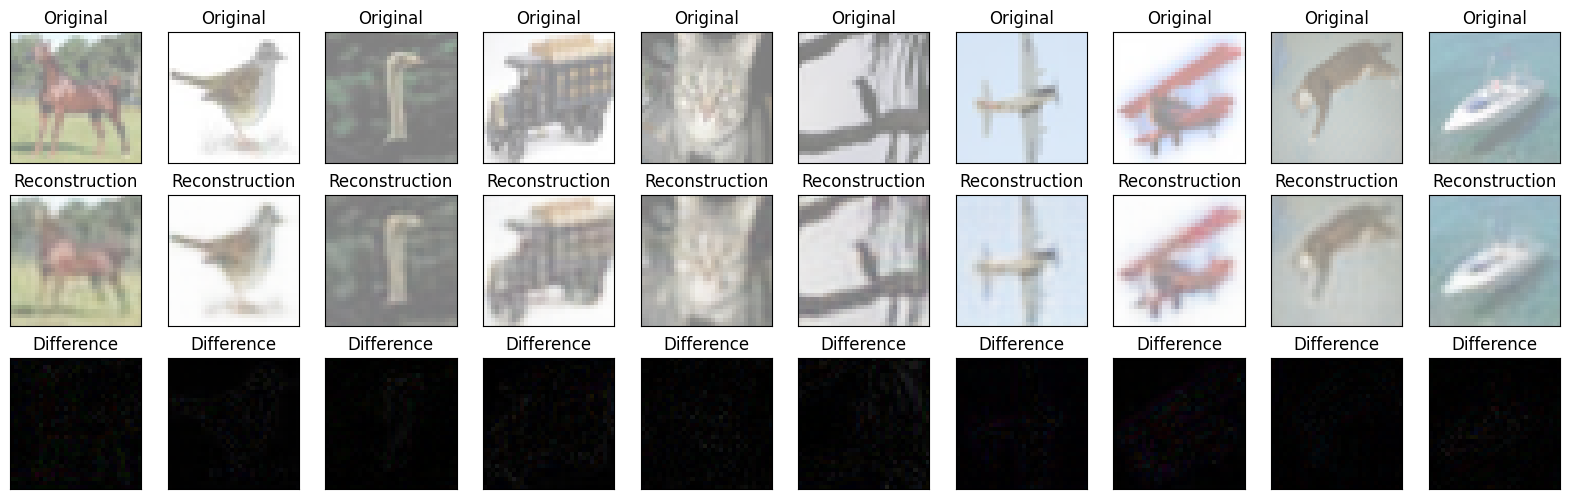

In [22]:
# Plot the images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    original_image = (images[i].permute(1, 2, 0) + 1) / 2
    plt.imshow(original_image)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    reconstructed_image = (decoded_imgs[i].permute(1, 2, 0) + 1) / 2
    plt.imshow(reconstructed_image)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstruction')

    # display difference
    ax = plt.subplot(3, n, i + 1 + 2*n)
    difference_image = torch.abs(original_image - reconstructed_image)
    plt.imshow(difference_image)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Difference')

plt.show()


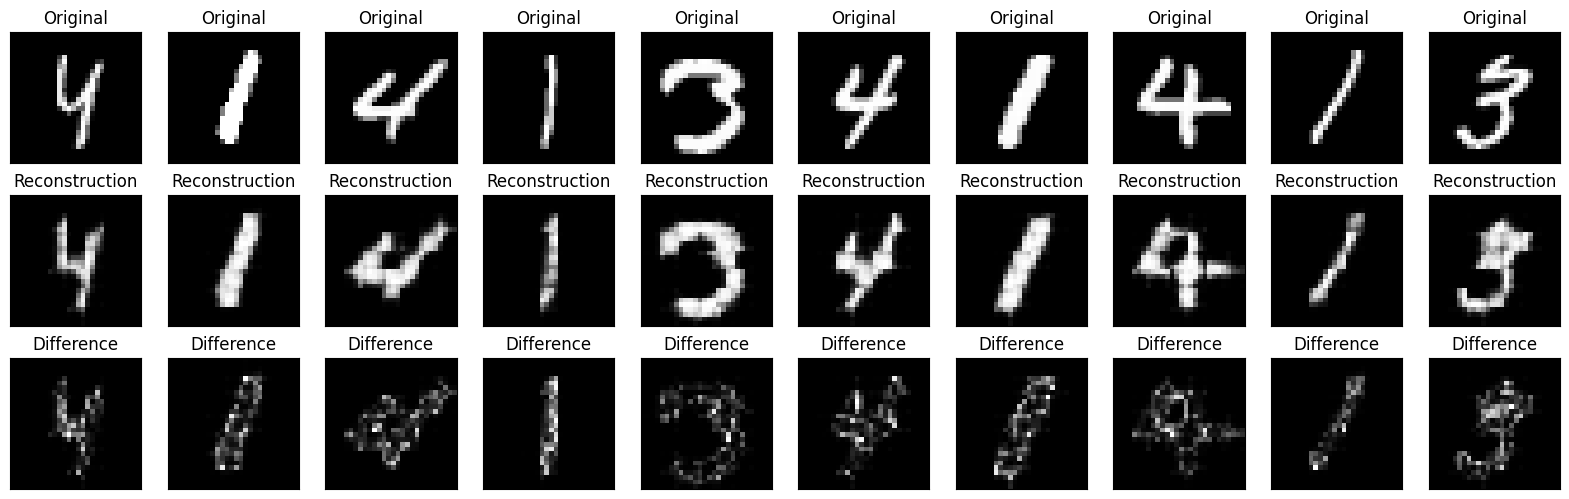

In [8]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Transformation for the images
transform = transforms.Compose([transforms.ToTensor()])

# MNIST dataset
dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to only include classes 0 through 4
indices = [i for i, (img, lbl) in enumerate(dataset) if lbl < 5]
filtered_dataset = torch.utils.data.Subset(dataset, indices)

dataloader = torch.utils.data.DataLoader(dataset=filtered_dataset, batch_size=10, shuffle=True)
# Assuming that you have initialized use_cuda = torch.cuda.is_available()
use_cuda = torch.cuda.is_available()

# Then modify your code as follows:
images, labels = next(iter(dataloader))
images = images.cuda() if use_cuda else images  # move images to GPU if available

decoded_imgs = autoencoder(images)



# Ensure they are detached, on CPU, and in the range [0, 1]
images = images.detach().cpu().clamp(0, 1)
decoded_imgs = decoded_imgs.detach().cpu().clamp(0, 1)

# Plot the images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i][0].numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstruction')

    # display difference
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(np.abs(images[i][0].numpy() - decoded_imgs[i][0].numpy()), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Difference')
    
plt.show()


# RGB channel_images 

# Siamese network 

In [1]:
import random
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np


In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128)
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid(),  # you might want to use a Sigmoid here because images are typically normalized to [0, 1]
        )

    def forward(self, x):
        x = x.view(x.size()[0], -1)  # flatten the tensor
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

  
class SiameseNetwork(nn.Module):
    def __init__(self, autoencoder):
        super(SiameseNetwork, self).__init__()
        self.autoencoder = autoencoder

    def forward(self, x1, x2):
        # Pass the inputs through the autoencoder
        output1, reconstructed_x1 = self.autoencoder(x1)
        output2, reconstructed_x2 = self.autoencoder(x2)
        
        return output1, output2, reconstructed_x1, reconstructed_x2


In [3]:
class SiameseMNISTDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __getitem__(self, index):
        img1, label1 = self.mnist_dataset[index]
        
        # Get a positive or negative example
        should_get_same_class = random.randint(0, 1)
        if should_get_same_class:
            indices = np.squeeze(np.where(self.mnist_dataset.targets == label1))
            idx2 = random.choice(indices)
        else:
            indices = np.squeeze(np.where(self.mnist_dataset.targets != label1))
            idx2 = random.choice(indices)
            
        img2, label2 = self.mnist_dataset[idx2]
        
        return (img1, img2), label1 == label2

    def __len__(self):
        return len(self.mnist_dataset)

# Create the dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Create the Siamese dataset
siamese_train_dataset = SiameseMNISTDataset(train_dataset)

# Create the dataloader
siamese_train_loader = DataLoader(siamese_train_dataset, shuffle=True, batch_size=64)




100%|██████████| 9912422/9912422 [00:00<00:00, 104752418.76it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29910047.86it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26367346.82it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4102181.04it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [4]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.mse_loss = nn.MSELoss()

    def forward(self, output1, output2, label, img1, img2, reconstructed_img1, reconstructed_img2):
        # Compute Euclidean Distance
        euclidean_distance = F.pairwise_distance(output1, output2)
        
        # Compute the reconstruction losses
        reconstruction_loss1 = self.mse_loss(reconstructed_img1, img1)
        reconstruction_loss2 = self.mse_loss(reconstructed_img2, img2)

        # Compute the final loss as a combination of contrastive loss and reconstruction loss
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        
        # Combine the losses
        combined_loss = loss_contrastive + reconstruction_loss1 + reconstruction_loss2

        return combined_loss


In [6]:
# Initialize the autoencoder
autoencoder = Autoencoder()

# Initialize the Siamese network with the autoencoder
net = SiameseNetwork(autoencoder)

# If CUDA is available, move the model to GPU
if torch.cuda.is_available():
    net = net.cuda()

# Initialize the criterion
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.00)
num_epochs=5

# Start training
for epoch in range(num_epochs):
    for i, data in enumerate(siamese_train_loader, 0):
        (img1, img2), label = data  # unpack the data correctly
        label = label.float() # convert labels to float
        if torch.cuda.is_available():
            img1, img2, label = img1.cuda(), img2.cuda(), label.cuda() # move to GPU if available
        # Forward pass to get output/embedding
        # Forward pass to get output/embedding and reconstructed images
        output1, output2, reconstructed_img1, reconstructed_img2 = net(img1, img2)
        output1 = output1.view(-1, 1, 28, 28)
        output2 = output2.view(-1, 1, 28, 28)


        # Compute Contrastive Loss and reconstruction loss
        loss = criterion(output1, output2, label, img1, img2, reconstructed_img1, reconstructed_img2)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

# Save the model
torch.save(net.state_dict(), "./siamese.pth")




RuntimeError: ignored

In [32]:
# Download and load the test data
test_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# Create the Siamese dataset for test data
siamese_test_dataset = SiameseMNISTDataset(test_dataset)

# Create the dataloader for test data
siamese_test_loader = DataLoader(siamese_test_dataset, shuffle=True, batch_size=64)


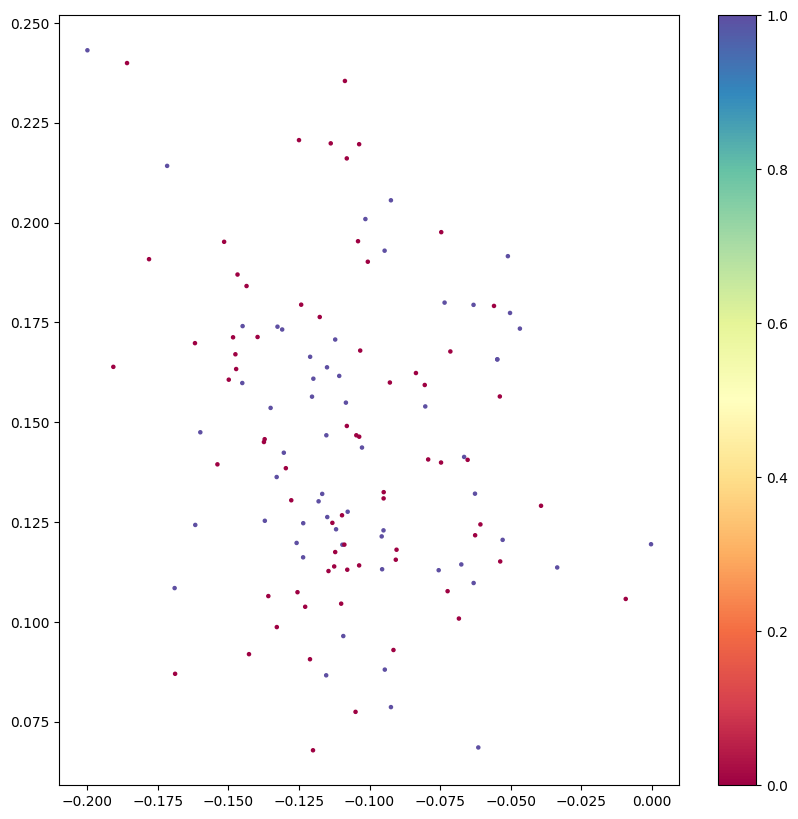

In [33]:
# load the saved model
import matplotlib.pyplot as plt

net.load_state_dict(torch.load("./siamese.pth"))
net.eval()  # Set the model to evaluation mode

# Load one batch of test data
(img1, img2), labels = next(iter(siamese_test_loader))

if torch.cuda.is_available():
    img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()

# Generate embeddings for the test image
output1, output2 = net(img1, img2)

# Convert tensor to numpy for visualization
output1 = output1.cpu().detach().numpy()
output2 = output2.cpu().detach().numpy()

# plot the embeddings
plt.figure(figsize=(10,10))
plt.scatter(output1[:, 0], output1[:, 1], c=labels.cpu().numpy(), cmap='Spectral', s=5)
plt.scatter(output2[:, 0], output2[:, 1], c=labels.cpu().numpy(), cmap='Spectral', s=5)
plt.colorbar()
plt.show()


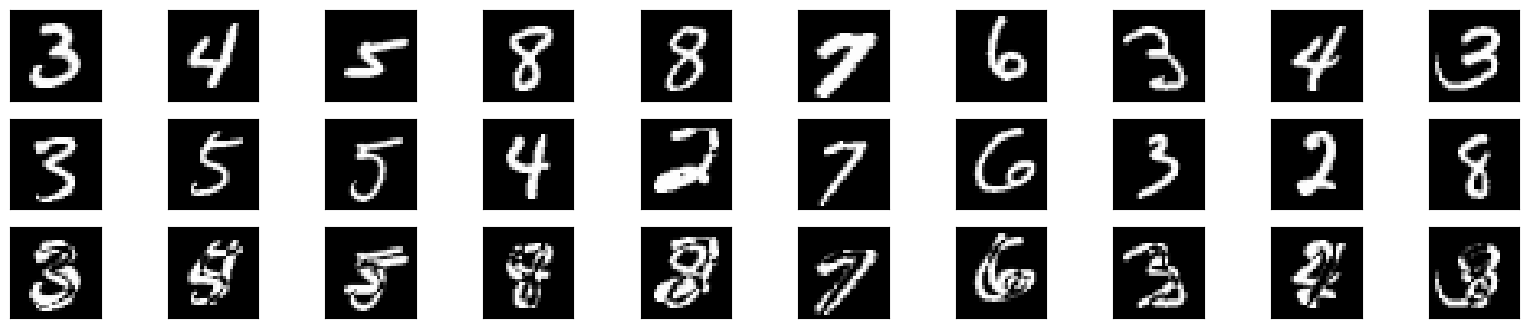

In [34]:
n = 10  # how many pairs we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(img1[i].cpu().numpy().transpose(1, 2, 0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(img2[i].cpu().numpy().transpose(1, 2, 0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference between images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    difference = np.abs(img1[i].cpu().numpy() - img2[i].cpu().numpy())
    plt.imshow(difference.transpose(1, 2, 0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

